In [11]:

import numpy as np

import sklearn 
from sklearn.metrics import *

import matplotlib.pyplot as plt

import os

import random

In [12]:

inputs = 785

outputs = 10

train_size = 10000

test_size = 10000

total_epoch = 60

plot=0

learning_rates = [0.1,0.01,0.001]

In [13]:
def file_load(filename):

	data = np.loadtxt(filename, delimiter=',')

	dataset = np.insert(data[:10000, np.arange(1, inputs)]/255, 0, 1, axis=1)

	labels = data[:10000, 0]

	return dataset, labels
	

In [14]:
print("Training Perceptron.....\n")
train_data, train_labels = file_load('mnist_train.csv')

print("Testing Perceptron......\n")
test_data, test_labels = file_load('mnist_test.csv')

Training Perceptron.....

Testing Perceptron......



In [15]:

def dot_product(data):

	output_array = np.dot(np.reshape(data, (1, inputs)), weights)					

	return output_array

In [16]:

def error_calculation(output_array, predicted):

	y = np.insert(np.zeros((1, outputs-1)), np.argmax(output_array), 1)				

	t = np.insert(np.zeros((1, outputs-1)), predicted, 1)					

	return t-y

In [17]:

def update_weights(error, data, weights):

	delta = np.dot(np.reshape(data, (inputs, 1)), np.reshape(error, (1, outputs)))

	weights += (lr * delta)		# Updated weights

	return weights

In [18]:

def training_perceptron(weights):

	for i in range(0, train_size):

		output_array = dot_product(train_data[i, :])				        # Feed-forward an image sample to get output array

		error = error_calculation(output_array, int(train_labels[i]))		# Evaluate to find array representation of predicted output

		weights = update_weights(error, train_data[i, :], weights)		    # Back propagate error through the network to get adjusted weights

	return weights

In [19]:

def testing_perceptron(dataset, labels, size):

	correct_output = []

	for i in range(0, size):

		output_array = dot_product(dataset[i, :])				    # Feed-forward an image sample to get output array

		correct_output.append(np.argmax(output_array))				# Append the predicted output to correct_output list

	return accuracy_score(labels, correct_output), correct_output

Epoch 0 :
Training Accuracy = 0.1164
Test Accuracy = 0.107


Epoch 1 :
Training Accuracy = 0.8669
Test Accuracy = 0.8536


Epoch 2 :
Training Accuracy = 0.8859
Test Accuracy = 0.8671


Epoch 3 :
Training Accuracy = 0.8772
Test Accuracy = 0.8556


Epoch 4 :
Training Accuracy = 0.8902
Test Accuracy = 0.8669


Epoch 5 :
Training Accuracy = 0.8962
Test Accuracy = 0.87


Epoch 6 :
Training Accuracy = 0.9142
Test Accuracy = 0.8853


Epoch 7 :
Training Accuracy = 0.9131
Test Accuracy = 0.8773


Epoch 8 :
Training Accuracy = 0.9048
Test Accuracy = 0.8769


Epoch 9 :
Training Accuracy = 0.8941
Test Accuracy = 0.8606


Epoch 10 :
Training Accuracy = 0.9031
Test Accuracy = 0.8687


Epoch 11 :
Training Accuracy = 0.8731
Test Accuracy = 0.8418


Epoch 12 :
Training Accuracy = 0.9062
Test Accuracy = 0.8684


Epoch 13 :
Training Accuracy = 0.9196
Test Accuracy = 0.8788


Epoch 14 :
Training Accuracy = 0.9073
Test Accuracy = 0.8671


Epoch 15 :
Training Accuracy = 0.9135
Test Accuracy = 0.8746


Epoch

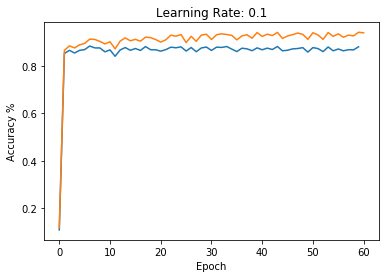

Epoch 0 :
Training Accuracy = 0.1163
Test Accuracy = 0.1093


Epoch 1 :
Training Accuracy = 0.8708
Test Accuracy = 0.852


Epoch 2 :
Training Accuracy = 0.8531
Test Accuracy = 0.8426


Epoch 3 :
Training Accuracy = 0.8634
Test Accuracy = 0.8519


Epoch 4 :
Training Accuracy = 0.8942
Test Accuracy = 0.8695


Epoch 5 :
Training Accuracy = 0.8893
Test Accuracy = 0.8628


Epoch 6 :
Training Accuracy = 0.8893
Test Accuracy = 0.8589


Epoch 7 :
Training Accuracy = 0.9098
Test Accuracy = 0.8745


Epoch 8 :
Training Accuracy = 0.9204
Test Accuracy = 0.8864


Epoch 9 :
Training Accuracy = 0.9098
Test Accuracy = 0.8793


Epoch 10 :
Training Accuracy = 0.8928
Test Accuracy = 0.8601


Epoch 11 :
Training Accuracy = 0.9077
Test Accuracy = 0.8698


Epoch 12 :
Training Accuracy = 0.9063
Test Accuracy = 0.8687


Epoch 13 :
Training Accuracy = 0.9089
Test Accuracy = 0.8701


Epoch 14 :
Training Accuracy = 0.9031
Test Accuracy = 0.8617


Epoch 15 :
Training Accuracy = 0.8876
Test Accuracy = 0.8517


Epo

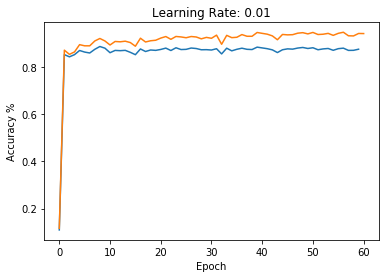

Epoch 0 :
Training Accuracy = 0.0764
Test Accuracy = 0.0693


Epoch 1 :
Training Accuracy = 0.8707
Test Accuracy = 0.8552


Epoch 2 :
Training Accuracy = 0.8857
Test Accuracy = 0.8658


Epoch 3 :
Training Accuracy = 0.885
Test Accuracy = 0.8637


Epoch 4 :
Training Accuracy = 0.8938
Test Accuracy = 0.8654


Epoch 5 :
Training Accuracy = 0.9049
Test Accuracy = 0.8754


Epoch 6 :
Training Accuracy = 0.9004
Test Accuracy = 0.8692


Epoch 7 :
Training Accuracy = 0.9103
Test Accuracy = 0.8765


Epoch 8 :
Training Accuracy = 0.8844
Test Accuracy = 0.8633


Epoch 9 :
Training Accuracy = 0.9089
Test Accuracy = 0.8747


Epoch 10 :
Training Accuracy = 0.9114
Test Accuracy = 0.869


Epoch 11 :
Training Accuracy = 0.9158
Test Accuracy = 0.8762


Epoch 12 :
Training Accuracy = 0.9002
Test Accuracy = 0.8623


Epoch 13 :
Training Accuracy = 0.9131
Test Accuracy = 0.8721


Epoch 14 :
Training Accuracy = 0.9231
Test Accuracy = 0.8744


Epoch 15 :
Training Accuracy = 0.9205
Test Accuracy = 0.8755


Epoc

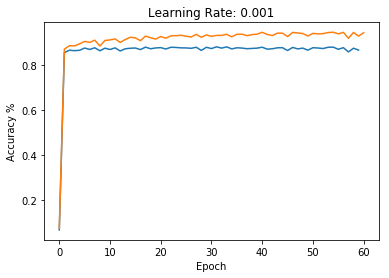

In [20]:

for lr in learning_rates:

    plot+=1

    # Randomize Weights are generated in the range of (-0.05,0.05)
    weights = (np.random.rand(inputs, outputs) - 0.5)*(0.1)

    # for each epoch:

    previous_accuracy = 1

    epoch = 0

    testacc_array = [ ]

    trainacc_array = [ ]

    while (1):
        # Accuracy is calculated on training dataset
        current_accuracy, correct_output = testing_perceptron(train_data, train_labels, train_size)			
        print("Epoch " + str(epoch) + " :\nTraining Accuracy = " + str(current_accuracy))

        trainacc_array.append(current_accuracy)  # Array is maintained to plot the graph

        if epoch==total_epoch:
            break
        # Accuracy is calculated on test dataset
        test_accu, correct_output = testing_perceptron(test_data, test_labels, test_size)			
        print("Test Accuracy = " + str(test_accu))
        print("\n")
        previous_accuracy = current_accuracy

        epoch+=1

        i=0

        testacc_array.append(test_accu)  # Array is maintained to plot the graph

        weights = training_perceptron(weights)# Train the network

    # Testing the network on test set again , calculating testing accuracy                                                               
    test_accu, correct_output = testing_perceptron(test_data, test_labels, test_size)				
    print("Test Accuracy = " + str(test_accu) + "\n\nLearning Rate = " + str(lr) + "\n\nConfusion Matrix :\n")

    print(confusion_matrix(test_labels, correct_output)) #calculating confusion matrix depicting how many correct output is classified for the testing data                   
                            
    print("\n")

    # Plotting the graph of training and testing accuracies against epoch:
    print("plot: ",plot)
    plt.figure(plot)
    plt.title("Learning Rate: %s" %lr)
    plt.plot(testacc_array)
    plt.plot(trainacc_array)
    plt.ylabel("Accuracy %")
    plt.xlabel("Epoch")

    plt.show()